### Project II


### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


--- 
 
<a id='intro'></a>
## Introduction

# Exploring Causes of No Shows to Medical Appointments in Brazil

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

This analysis will explore the dataset to gain insight into questions related to why patients no show to their scheduled medical appointment.



#### Questions to be explored in this analysis:

* Did the length of time between the appointment being scheduled and the actual appointment day have an impact on whether or not a patient no shows?
* Which age range has a higher frequency of no shows?
* Did male or female patients no show more often?
* Did patients who received an SMS appointment reminder have fewer no shows than patients who did not receive an SMS reminder?

*It should be noted that all findings are tentative.*


---

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style("darkgrid")
sns.set_palette('viridis')
%matplotlib inline

In [2]:
df = pd.read_csv('noshowappt_may2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


*In the above cells, the dataset and relevant libraries are imported, the dataset is checked to see how many entries are in the the dataset, what the columns are titled, the datatypes of each column and if there are any incomplete rows of dataset. The dataset is also described in order to see the mean, min, max, and standard deviation of the data.*

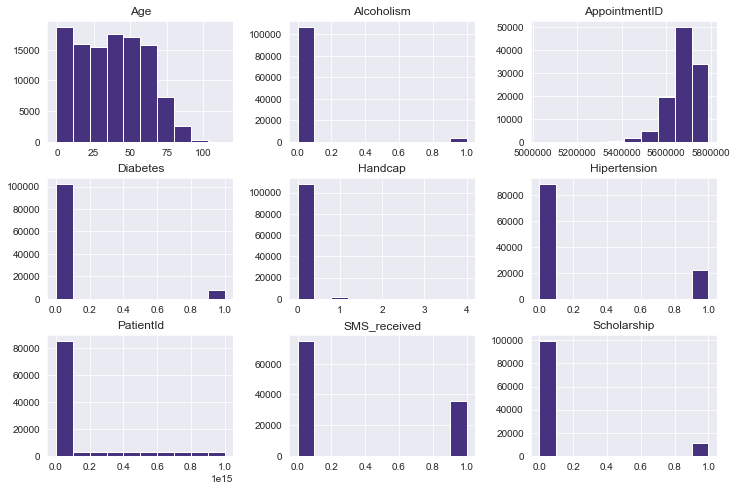

In [6]:
df.hist(figsize=(12,8));

*The above cell provides simple histograms of the dataset to get an overview of the ranges and distribution of the data values in each column.*

---

<a id='cleaning'></a>
### Data Cleaning

This data set appears to be fairly clean, with no missing enries and the majority of related fields are the same data type. However, there are some columns that will need be renamed and/or removed, as they are irrelevant to the analysis that will be completed. 

**Some issues found with the data that need to be corrected and cleaned before moving forward with analysis:**
* Check for duplicate rows
* Replace any age entries that are "-1" with the age mean
* Change columns to all lowercase and replace underscores 
* Drop columns that will not be useful within the scope of this analysis
* Ensure datatypes of all columns are correct for this analysis


In [7]:
sum(df.duplicated())

0

*This cell checks the dataset to determine if there are any duplicate rows, and luckily, there are none.*

In [8]:
age_mean = df.Age.mean()
age_mean

37.08887421173107

In [9]:
df.replace({'Age':-1}, age_mean, inplace=True)

In [10]:
df.Age.describe()

count    110527.000000
mean         37.089219
std          23.109921
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [11]:
df.Age = df.Age.astype(int)

*The above cells check the 'Age' column to determine the mean age in the dataset and replaces the outliers in this column that list the age as '-1' with the mean of '37', then checks to ensure the '-1' entries have correctly been removed from the column by calling the ```.describe()``` function. The 'Age' column is then converted from a float to an integer datatype.*

**Note: This analysis will leave age entries of '0' and interpret those as infants under the age of one. The age entries of '115' will not be removed due to the plausibility of this information being accurate.**

In [12]:
df.rename(columns=lambda x: x.strip().lower(), inplace=True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


*This cell strips all capitalization from the column headers and changes the type to lowercase and checks to ensure the change has occurred.*

In [13]:
df.rename(columns={'patientid':'patient_id', 'appointmentid':'appointment_id', 'scheduledday':'scheduled_day', 'appointmentday':'appointment_day','hipertension':'hypertension', 'handcap':'handicapped', 'no-show':'appointment'}, inplace=True)
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,appointment
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


*This cell renames some columns, placing an '_' to separate words, changes hyphens to underscores, and corrects the spelling of other columns for readability and checks to ensure the changes applied correctly.*

In [14]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.date


*This cell changes the 'scheduled_day' & 'appointment_day' columns to datetime objects, which will be useful for this analysis, and strips the time codes from the data within the column, as it is irrelevant to this analysis.*

In [15]:
df.drop(['patient_id', 'appointment_id', 'hypertension', 'scholarship', 'neighbourhood', 'diabetes', 'alcoholism', 'handicapped'], axis=1, inplace=True)

*This cell drops the 'patient_id', 'appointment_id', 'hypertension', 'scholarship', 'neighbourhood', 'diabetes', 'alcoholism', and 'handicapped' columns from the dataset, as this data will not be explored within the scope of this analyis.*

In [16]:
df['appointment'] = df['appointment'].apply(lambda x : 'No Show' if x == 'Yes' else 'Attended')
df.head(9)

,gender,scheduled_day,appointment_day,age,sms_received,appointment
0,F,2016-04-29,2016-04-29,62,0,Attended
1,M,2016-04-29,2016-04-29,56,0,Attended
2,F,2016-04-29,2016-04-29,62,0,Attended
3,F,2016-04-29,2016-04-29,8,0,Attended
4,F,2016-04-29,2016-04-29,56,0,Attended
5,F,2016-04-27,2016-04-29,76,0,Attended
6,F,2016-04-27,2016-04-29,23,0,No Show
7,F,2016-04-27,2016-04-29,39,0,No Show
8,F,2016-04-29,2016-04-29,21,0,Attended


*This cell changes the 'no_show' column title from 'no_show' to 'appointment' and changes the values in the column from "Yes / No" to "No Show / Attended" for readability in the data, as well as in the analysis.*

In [17]:
df['sms_received'] = df['sms_received'].apply(lambda x : 'Received' if x == 1 else 'Not Received')

In [18]:
df.sms_received = df.sms_received.astype(str)
df.head()

,gender,scheduled_day,appointment_day,age,sms_received,appointment
0,F,2016-04-29,2016-04-29,62,Not Received,Attended
1,M,2016-04-29,2016-04-29,56,Not Received,Attended
2,F,2016-04-29,2016-04-29,62,Not Received,Attended
3,F,2016-04-29,2016-04-29,8,Not Received,Attended
4,F,2016-04-29,2016-04-29,56,Not Received,Attended


*The above cells change the 'sms_received' column values from '1 / 0' to 'Received / Not Received' for readability in the data, as well as in the analysis.*

In [19]:
bins = [0, 18, 30, 50, 60, 80, 120]
labels = ['Child', 'Young Adult', 'Adult', 'Middle-Aged', 'Senior', 'Elderly']
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest = True)
df.tail()

,gender,scheduled_day,appointment_day,age,sms_received,appointment,age_range
110522,F,2016-05-03,2016-06-07,56,Received,Attended,Middle-Aged
110523,F,2016-05-03,2016-06-07,51,Received,Attended,Middle-Aged
110524,F,2016-04-27,2016-06-07,21,Received,Attended,Young Adult
110525,F,2016-04-27,2016-06-07,38,Received,Attended,Adult
110526,F,2016-04-27,2016-06-07,54,Received,Attended,Middle-Aged


*This cell creates a new column called "age_range" which classifies the age of the patient into the following age ranges:*

* ***0-17 =*** Child
* ***18-29 =*** Young Adult
* ***30-49 =*** Adult
* ***50-59 =*** Middle-Aged
* ***60-79 =*** Senior
* ***80+ =*** Elderly

In [20]:
df['days'] = (df['appointment_day'] - df['scheduled_day']).abs().dt.days
df.head(10)

,gender,scheduled_day,appointment_day,age,sms_received,appointment,age_range,days
0,F,2016-04-29,2016-04-29,62,Not Received,Attended,Senior,0
1,M,2016-04-29,2016-04-29,56,Not Received,Attended,Middle-Aged,0
2,F,2016-04-29,2016-04-29,62,Not Received,Attended,Senior,0
3,F,2016-04-29,2016-04-29,8,Not Received,Attended,Child,0
4,F,2016-04-29,2016-04-29,56,Not Received,Attended,Middle-Aged,0
5,F,2016-04-27,2016-04-29,76,Not Received,Attended,Senior,2
6,F,2016-04-27,2016-04-29,23,Not Received,No Show,Young Adult,2
7,F,2016-04-27,2016-04-29,39,Not Received,No Show,Adult,2
8,F,2016-04-29,2016-04-29,21,Not Received,Attended,Young Adult,0
9,F,2016-04-27,2016-04-29,19,Not Received,Attended,Young Adult,2


*This cell creates a new column named 'days', by using a datetime function to calculate the amount of days that have passed between the day the patient scheduled the appointment ('scheduled_day') and the day of the appointment ('apointment_day').*

In [21]:
df.days.max()

179

In [22]:
bins = [0, 7, 14, 30, 180]
labels = ['< 1 Week', '1+ Week', '2+ Weeks', '1+ Month' ]
df['days_range'] = pd.cut(df['days'], bins=bins, labels=labels, include_lowest = True)
df.head()

,gender,scheduled_day,appointment_day,age,sms_received,appointment,age_range,days,days_range
0,F,2016-04-29,2016-04-29,62,Not Received,Attended,Senior,0,< 1 Week
1,M,2016-04-29,2016-04-29,56,Not Received,Attended,Middle-Aged,0,< 1 Week
2,F,2016-04-29,2016-04-29,62,Not Received,Attended,Senior,0,< 1 Week
3,F,2016-04-29,2016-04-29,8,Not Received,Attended,Child,0,< 1 Week
4,F,2016-04-29,2016-04-29,56,Not Received,Attended,Middle-Aged,0,< 1 Week


In [23]:
df.days_range.value_counts()

< 1 Week    70753
2+ Weeks    17371
1+ Week     12025
1+ Month    10378
Name: days_range, dtype: int64

*These cells first check the maximum value in the newly created 'days' column to determine where to set the upper limit of the 'days_range' values. The next cell creates a new column called "days_range" to classify the amount of days that have passed since the patient scheduled their appointment, by subtracting the 'scheduled_day' value from 'appointment_day' value and then calling the ```.value_counts()``` function to ensure it has worked.*

*For the 'days_range' column, the ranges were set as follows:*

* ***0-6 days =*** <1 Week
* ***7-14 days =*** 1+ Week
* ***14-29 days =*** 2+ Weeks
* ***30+ days =*** 1+ Month



---


<a id='eda'></a>
# Exploratory Data Analysis

## Description of Variables

*A **'no show'** will be defined, within the scope of this analysis, as a patient not arriving for a previously scheduled appointment. Relationships between gender, age, appointment reminders, and time between scheduling an appointment and the actual appointment date, and their relation to no shows, will be explored in this analysis.*

Each variable used in this analysis will be summarized below before exploring relationships between these variables.



### Appointments

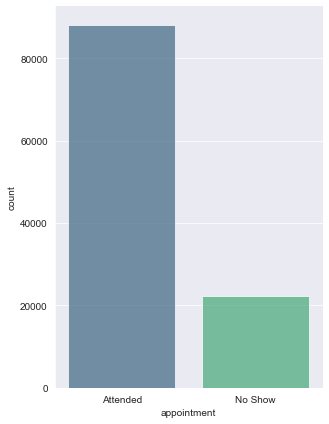

In [24]:
sns.catplot(alpha=0.7, x='appointment', data=df, kind="count", palette='viridis', aspect=0.75, height=6);

For this data set, there are 110,527 total entries for appointments categorized as *'Attended'* and *'No Show'*. An appointment is marked as *'Attended'* if the patient arrived for their appointment on the scheduled day. The appointment is marked as *'No Show'* if the patient failed to arrive for their appointment on the scheduled day.

There are 88,208 attended appointments and 22,319 no show appointments in this data set, with no shows accounting for 20% of the appointments in this data set.

### Gender Distribution

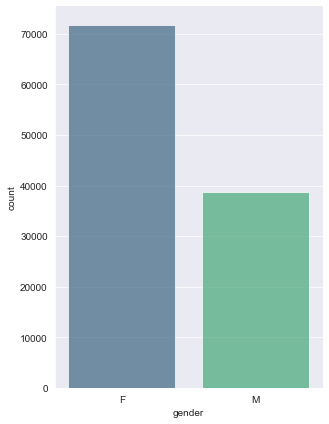

In [25]:
sns.catplot(alpha=0.7, x='gender', data=df, kind="count", palette='viridis', aspect=0.75, height=6);

The data set can be divided by gender, with the data in this data set being limited to *'Female'* and *'Male'*. There are 71,840 female patients and 38,687 male patients in this data set, with females outnumbering male patients nearly 2:1.

### Age Distribution

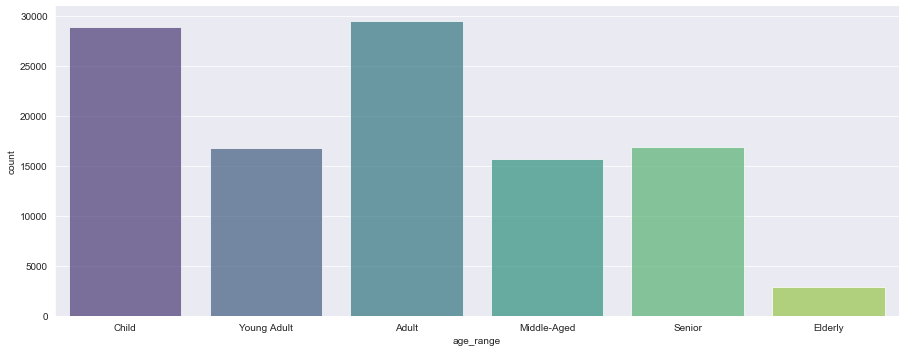

In [26]:
sns.catplot(alpha=0.7, x='age_range', data=df, kind="count", palette='viridis', aspect=2.5, height=5);

The ages of patients in this dataset have been classified into age ranges as follows:

**Age Ranges** 
* **0-17** - Child
* **18-29** - Young Adult
* **30-49** - Adult
* **50-59** - Middle-Aged
* **60-79** - Senior
* **80+** - Elderly

'Adults' and 'Children' make up the two largest subsets of patients within this dataset, consisting of 29,473 and 28,866 patients, respectively. Those are followed by 16,910 'Seniors', 16,765 'Young Adults', 15,661 'Middle-Aged', and 2,852 'Elderly' patients.

### Days Range Time Delta - Scheduled Appointment Day vs. Actual Appointment Day

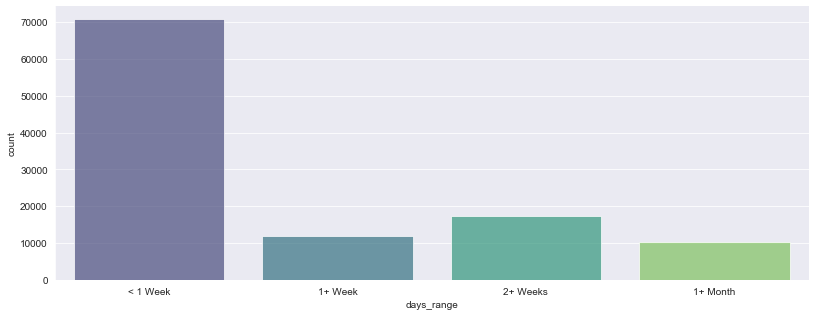

In [27]:
sns.catplot(alpha=0.7, x='days_range', data=df, kind="count", palette='viridis', aspect=2.5, height=4.5)
plt.rcParams['patch.force_edgecolor'] = True;

'Days Range' looks at the difference in days between the day the patient scheduled an appointment and the actual appointment day. This is calculated by subtracting the 'appointment_day' from the 'scheduled_day'. This amount of days is then classified into the following ranges:

* ***0-6 days =*** <1 Week
* ***7-14 days =*** 1+ Week
* ***14-29 days =*** 2+ Weeks
* ***30+ days =*** 1+ Month

The vast majority of appointments, 70,753, were scheduled less than one week before the actual appointment, followed by 2+ weeks, 1+ week, and 1+ month, at 17,371, 12,025, and 10,378 respectively.

### SMS Text Reminders

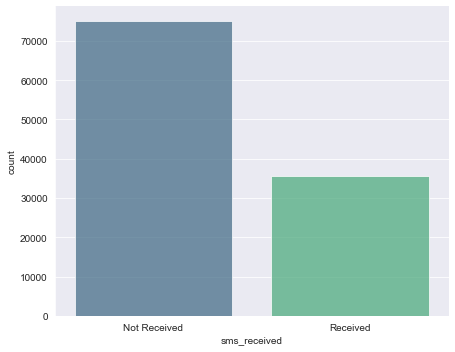

In [28]:
sns.catplot(alpha=0.7, x='sms_received', data=df, kind="count", palette='viridis', aspect=1.25, height=5)
plt.rcParams['patch.force_edgecolor'] = True;

This dataset has information on patients who received, and those who did not receive, SMS text message appointment reminders for their appointments. A large majority, 75,045, did not receive SMS appointment reminders and less than half, 35,482 patients, did receive SMS appointment reminders.

---

## Analysis

### Which age ranges have a higher frequency of no shows?

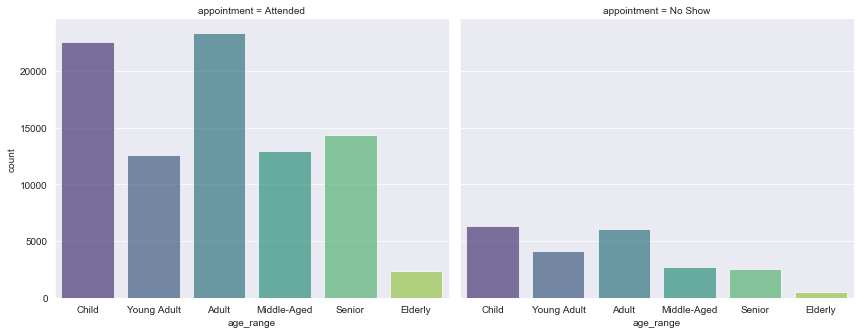

In [29]:
sns.catplot(alpha=0.7, x='age_range', col='appointment', data=df, kind="count", palette='viridis', aspect=1.25, height=4.75)
plt.rcParams['patch.force_edgecolor'] = True;

The above-left chart shows the count of attended appointments for each age range, while the above-right chart shows the count of no show appointments for each age range.

The 'Child' and 'Adult' age ranges no show to their appointments more often than any other age range in this dataset, followed by 'Young Adults', 'Middle-Aged', 'Senior', and 'Elderly'. This could be due to the fact that the 'Child' and 'Adult' patient age ranges account for more than 50% of the total patients in this dataset (58,339 vs 52,188 respectively), so there is a larger sample of appointments for those patients. The 'Adult' and 'Child' age ranges also have the largest amount of attended appointments in this dataset. These two aspects combined would infer that these two age ranges have the most no show appointments and attended appointments because, in this dataset, children and young adults have more medical appointments overall, and is not necessarily related to these age ranges tending to no show more often than others.

**Age Ranges** 
* **0-17** - Child
* **18-29** - Young Adult
* **30-49** - Adult
* **50-59** - Middle-Aged
* **60-79** - Senior
* **80+** - Elderly


### Does the time between the day an appointment is scheduled and the actual appointment day have an effect on no shows?

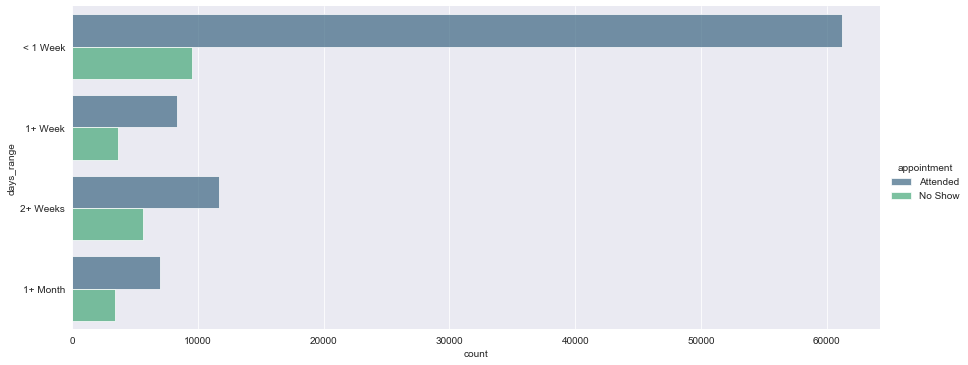

In [30]:
sns.catplot(alpha=0.7, y='days_range', hue='appointment', data=df, kind="count", palette='viridis', aspect=2.5, height=5)
plt.rcParams['patch.force_edgecolor'] = True;

By examining the amount of days that pass between a patient scheduling an appointment and the actual appointment day, it should be clear to determine if the amount of time between those two dates increases, the likelihood of a patient no showing would increase. 

In this dataset, the average amount of days between scheduling an appointment and the actual appointment is 10 days. Appointments with less than one week after scheduling have the most attended appointments, but also the most no shows. On the surface, this is surprising, but given the total number of appointments scheduled with less than a week before the appointment date is over 70,000, it is not entirely surprising this range has the most no shows, as well, given the large disparity between the days range.

Conversely, the range of '1+ Month' has the least number of no shows, but given the total appointments in that range is only 10,378, it is likely the variable is impacted by the amount of appointments and a more even distribution of appointments in different ranges would need to be gathered to determine if there is a correlation between the number of days between scheduling appointments and the appointment days and no shows for this dataset.

### Are female or male patients more likely to no show?

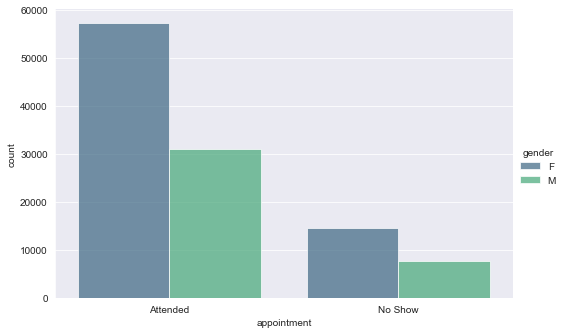

In [31]:
sns.catplot(alpha=0.7, x='appointment', hue='gender', data=df, kind="count", palette='viridis', height=4.75, aspect=1.5)
plt.rcParams['patch.force_edgecolor'] = True
plt.rcParams['figure.figsize'] = 20, 20

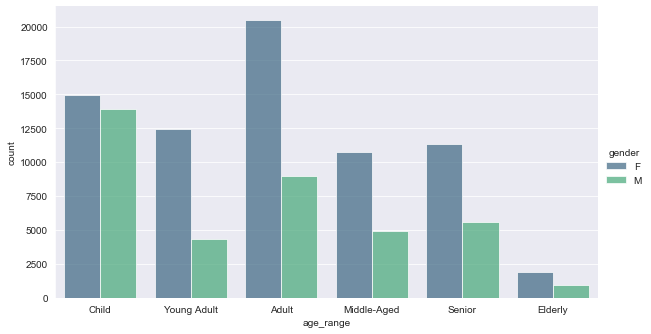

In [32]:
sns.catplot(alpha=0.7, x='age_range', hue='gender', data=df, kind="count", palette='viridis', aspect=1.75, height=4.75)
plt.rcParams['patch.force_edgecolor'] = True;

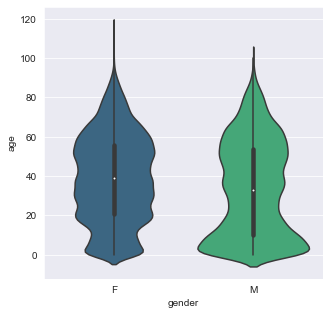

In [34]:
sns.violinplot(x="gender", y="age", data=df, orient='v', palette='viridis', size=2)
plt.rcParams['figure.figsize'] = 3, 3

Examining the relationship between gender and no show appointments in this dataset shows that female patients no show to nearly twice as many appointments as males. The same is true for attended appointments as well, with female patients attending nearly double the amount of appointments as male patients.

This is consistent with the disparity in numbers of female and male patients within the dataset, with female patients outnumbering the male patients nearly 2:1 at 71,840 to 38,687 respectively. Female patients no showed to 25% of their scheduled appointments, while male patients also no showed to 25% of their scheduled appointments.

It is also worth noting that female patients fall predominantly within the 'Adult' age range of 30-49 years of age, which is the largest subset of age range in this dataset, making up 71% of the 'Adult' age range. Females also make up 50% of the 'Child' subset of age range, as well, the second largest subset of age ranges in this data set. 

There seems to be a correlation between gender and no shows to appointments, but it is difficult to determine causation with such a skewed sample size.

### Do patients who receive an SMS text appointment reminder attend more appointments than those that do not receive a text reminder?

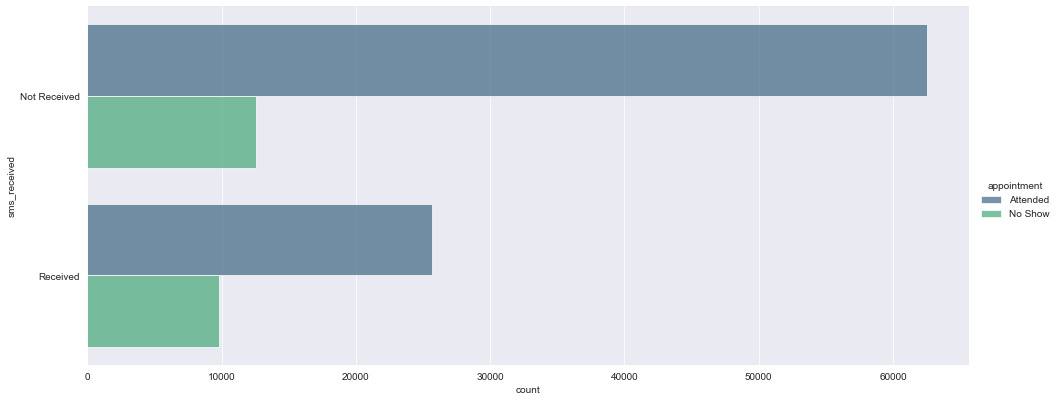

In [35]:
sns.catplot(alpha=0.7, y='sms_received', hue='appointment', data=df, kind="count", palette='viridis', aspect=2.5, height=5.5)
plt.rcParams['patch.force_edgecolor'] = True
plt.rcParams['figure.figsize'] = 18, 18

Exploring the impact of patients receiving SMS text appointment reminders on no shows in this dataset shows that appointment reminders did not appear to have a noticeable effect on patients no showing to their appointments.

According to this dataset, 35,482 SMS reminders were received by patients. Of those patients who received the SMS reminder, 9,784 patients no showed to their scheduled appointment, while 25,698 attended their scheduled appointment.

75,045 SMS reminders were not received by patients in this dataset. Of those patients who *did not* receive an SMS reminder, 12,535 patients no showed to their scheduled appointment, while 62,510 attended their scheduled appointment.


* 16% of patients who did not receive an SMS reminder no showed to their appointment
* 83% of patients who did not receive an SMS reminder attended their appointment

* 27% of patients who received an SMS reminder no showed to their appointment
* 72% of patients who received an SMS reminder attended their appointment.



---

<a id='conclusions'></a>
## Conclusions



This analysis found that children (defined as ages 0-17) and adults (defined as ages 30-49) no showed to their medical appointments more than the other age ranges within this dataset. It is difficult to infer any conclusions from this, however, as children and adults also made up for more than 50% of the total patients in the dataset, thus providing a much larger sample size than any other age ranges.

The time between scheduling an appointment and the appointment day was also analyzed to determine if the amount of days between scheduling an appointment and the appointment itself directly correlated to whether a patient would no show or attend; the assumption being that the more days between scheduling an appointment and the actual appointment itself, the more likely a patient is to no show due to an unknown variable. This analysis found that, while the average amount of days between scheduling an appointment and the appointment itself was 10 days, more patients no showed, and attended, appointments that were within one week of being scheduled. However, due to the vast majority of appointments (over 70,000) were scheduled within a week’s time, it would be natural to have a larger amount of no shows than the other ranges.

In terms of gender, female patients were found to no show to nearly twice as many medical appointments as male patients. However, female patients outnumber male patients nearly 2:1 in this dataset, making that disparity more consistent with the sample size of each gender. When looking at the percentage of appointments that female and male patients no showed, both female and male patients no showed to 25% of their scheduled appointments. Female patients were also found to make up 71% and 50% of the ‘Adult’ and ‘Child’ age ranges, respectively, meaning female patients made up nearly ¾ of the entire ‘Adult’ age range, which had the second-largest number of no shows by age range within the dataset.

The effect of SMS appointment reminders on no shows was also explored. In general, one may hypothesize that receiving an SMS reminder would reduce the likelihood of a patient no showing to their appointment. However, this analysis found that, according to this dataset, patients who did not receive an SMS reminder both attended, and no showed to, more appointments than patients who did receive an SMS reminder. Conversely, of patients who received an SMS reminder, a larger percentage no showed to their appointments. However, once again, there is a significantly larger number of patients who did not receive an SMS reminder than those who did. It is also unclear of how it was determined if a patient received or did not receive these SMS reminders. 

Overall, while specific questions can be answered from this dataset, it is impossible to determine causation or definitively make any meaningful conclusions regarding any of the questions posed beyond simply being able to answer a question within the confines of the data that is provided. 